# Example

In [6]:
!wget "https://warwick.ac.uk/fac/cross_fac/tia/data/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip" -O ./temp.zip
!unzip ./temp.zip
!rm ./temp.zip

In [7]:
from enum import Enum, auto
from pathlib import Path
from pprint import pprint

from matplotlib import pyplot as plt
from PIL import Image
from sourcelib.associations import StemSplitterAssociater, associate_files
from sourcelib.collect import get_files_from_folder, get_files_from_path
from sourcelib.extension import Extension, create_extensions_mapping
from sourcelib.file import File

""" Modes """


class Mode(Enum):
    TRAIN = auto()
    TESTA = auto()
    TESTB = auto()


""" Extensions """


class ImageExtension(Extension):
    ...


class AnnotationExtension(Extension):
    ...


BITMAP_IMAGE_EXTENSION = ImageExtension((".bmp",))
BITMAP_ANNOTATION_EXTENSION = AnnotationExtension((".bmp",))

IMAGE_EXTENSIONS = create_extensions_mapping([BITMAP_IMAGE_EXTENSION])
ANNOTATION_EXTENSIONS = create_extensions_mapping([BITMAP_ANNOTATION_EXTENSION])


class DataFile(File):
    MODES = Mode

    def open(self):
        return Image.open(self.path)

    @staticmethod
    def show(data, title, ax):
        ax.set_title(title)
        ax.imshow(data)
        ax.axis("off")
    

class AnnotationDataFile(DataFile):
    IDENTIFIER: str = "annotation"
    EXTENSIONS = ANNOTATION_EXTENSIONS


class ImageDataFile(DataFile):
    IDENTIFIER: str = "image"
    EXTENSIONS = IMAGE_EXTENSIONS


In [8]:
## Collect and Associate

In [9]:
# lets collect all data files
training_annotation_files = get_files_from_folder(
    file_cls=AnnotationDataFile,
    folder="./Warwick QU Dataset (Released 2016_07_08)/",
    mode=Mode.TRAIN,
    regex="train.*anno",
)


# lets collect all image files
training_image_files = get_files_from_folder(
    file_cls=ImageDataFile,
    folder="./Warwick QU Dataset (Released 2016_07_08)/",
    mode=Mode.TRAIN,
    filters=("train",),
    excludes=("anno",),
)


# lets associate the data and image files
associations = associate_files(
    training_image_files,
    training_annotation_files,
    associator=StemSplitterAssociater(("_anno",)),
    exact_match=True,
)


## Copying, Open, and Show

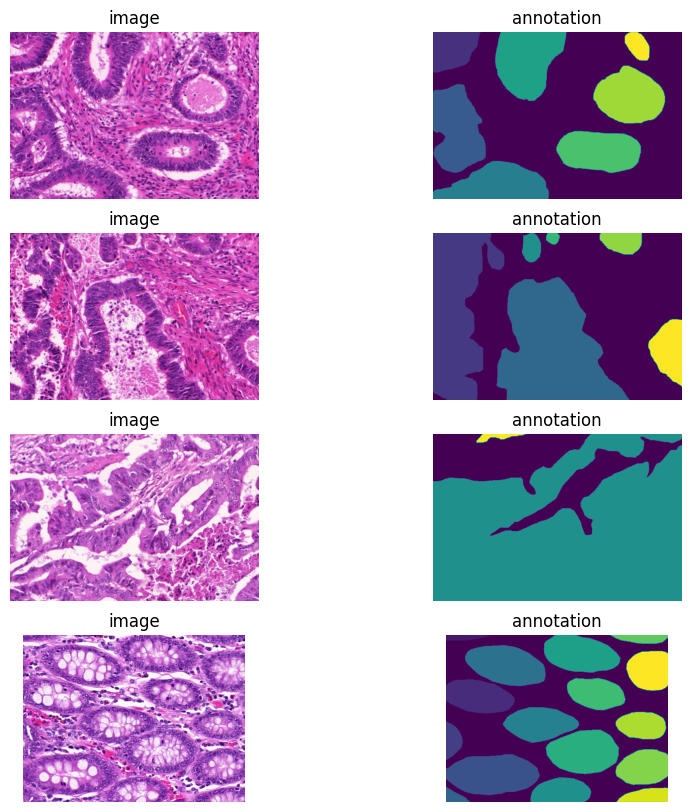

In [10]:
# open and show the associated files
items = 4
copy_folder = Path("/tmp/my_tmp_dir/")

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
itemsview = iter(associations.items())
for idx in range(4):
    key, association = next(itemsview)
    for iidx, (identifier, files) in enumerate(association.items()):
        for fidx, file in enumerate(files):
            file.copy(copy_folder / identifier)
            content = file.open()
            file.show(content, title=identifier, ax=axes[idx][iidx])
plt.show()